In [1]:
%matplotlib inline
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import math
import numpy

In [2]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

中心 (2, 3) 半径 6 の円周上に、ノイズを乗せて、点群を作る

In [3]:
center = (2.0, 3.0)
radius = 6.0

In [4]:
x_list = []
y_list = []
x_append = x_list.append
y_append = y_list.append
for i in range(100):
  theta = numpy.random.rand() * 2 * math.pi
  x = center[0] + radius * math.cos(theta) + numpy.random.normal(0.0, 0.3)
  y = center[1] + radius * math.sin(theta) + numpy.random.normal(0.0, 0.3)
  x_append(x);
  y_append(y);

In [5]:
np_x = numpy.array(x_list);
np_y = numpy.array(y_list);
len(np_x)

100

In [6]:
np_x, np_y

(array([ 7.34129066,  5.74516318, -2.08000904, -1.26983373,  7.94961584,
         2.26025028,  8.31481927, -3.86531505, -2.63137949,  8.28520899,
         4.22173577,  3.95543304, -1.01387253, -3.69863064, -2.13282749,
         8.4222775 , -0.5467952 ,  1.81016632,  7.43496486,  8.02987346,
         3.52431776,  0.756679  ,  7.73283424, -3.06834089, -2.93155741,
        -3.80736806,  6.26948217,  4.49169569, -2.33489134,  6.45105154,
         5.38269376,  3.31285266,  8.05121716,  4.80441242, -2.33595812,
         4.51721738, -0.98465108,  2.83016803, -4.29747895,  7.90799482,
        -2.92919453, -3.33792289, -2.13472147,  1.59213066,  6.81935707,
         5.21727872,  7.97425329,  2.79756722,  6.42269535, -0.53839232,
         2.50479805,  7.03573193,  8.31685849, -1.37099609, -1.02550139,
        -3.13197521,  5.53138651,  0.93487684,  7.00763938, -3.13369669,
         4.04639258, -1.6637997 , -3.87218101,  4.64347472, -2.91131519,
         4.73056434,  0.03048777,  7.11106895,  5.1

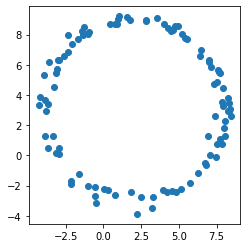

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.set_aspect('equal')

ax.scatter(np_x, np_y)

最小二乗法で、中心と半径を推定してみる

python なら逆行列とかも簡単に計算できるが、練習のためあえて手計算で

In [8]:
sum_xx = sum([ x * x for x in np_x]);
sum_yy = sum([ y * y for y in np_y]);
sum_xy = sum([ x * y for (x, y) in zip(np_x, np_y) ]);
sum_x  = sum(np_x);
sum_y  = sum(np_y);
rhs1   = sum([ (x * x + y * y) * x for (x, y) in zip(np_x, np_y) ]);
rhs2   = sum([ (x * x + y * y) * y for (x, y) in zip(np_x, np_y) ]);
rhs3   = sum([ (x * x + y * y)     for (x, y) in zip(np_x, np_y) ]);

In [9]:
def gyaku_matrix_3x3(a11, a12, a13,
                    a21, a22, a23,
                    a31, a32, a33):
  det = ((a11 * a22 * a33) + (a21 * a32 * a13) + (a31 * a12 * a23)
         - (a11 * a32 * a23) - (a21 * a12 * a33) - (a31 * a22 * a13));
  if (det == 0.0):
    raise ValueError("No Inverse");
  # End If
  
  # 余因子
  cofac11 = a22 * a33 - a23 * a32;
  cofac12 = a21 * a33 - a23 * a31;
  cofac13 = a21 * a32 - a22 * a31;

  cofac21 = a12 * a33 - a13 * a32;
  cofac22 = a11 * a33 - a13 * a31;
  cofac23 = a11 * a32 - a12 * a31;

  cofac31 = a12 * a23 - a13 * a22;
  cofac32 = a11 * a23 - a13 * a21;
  cofac33 = a11 * a22 - a12 * a21;

  return  [ [ +cofac11 / det, -cofac21 / det, +cofac31 / det],
            [ -cofac12 / det, +cofac22 / det, -cofac32 / det],
            [ +cofac13 / det, -cofac23 / det, +cofac33 / det],
  ]

In [10]:
a_inv = gyaku_matrix_3x3(sum_xx, sum_xy, sum_x,
                     sum_xy, sum_yy, sum_y,
                     sum_x,  sum_y,  len(np_x)
                     );
a_inv

[[0.0005364377673160739, 2.648074249627274e-05, -0.0014640160353773307],
 [2.648074249627274e-05, 0.0005909260011475039, -0.002129660999425418],
 [-0.0014640160353773307, -0.002129660999425418, 0.021174485966652317]]

In [11]:
A = - a_inv[0][0] * rhs1 - a_inv[0][1] * rhs2 - a_inv[0][2] * rhs3;
B = - a_inv[1][0] * rhs1 - a_inv[1][1] * rhs2 - a_inv[1][2] * rhs3;
C = - a_inv[2][0] * rhs1 - a_inv[2][1] * rhs2 - a_inv[2][2] * rhs3;
(A, B, C)

(-4.075967265804604, -6.038067585773588, -22.865462423217082)

In [12]:
a = -A / 2; b = -B / 2; r = math.sqrt(A * A + B * B - 4 * C) / 2;
(a, b, r)

(2.037983632902302, 3.019033792886794, 6.011106782763651)

In [13]:
c = patches.Circle(xy=(a, b), radius=r, fc='g', ec='r', fill=False)
ax.add_patch(c)

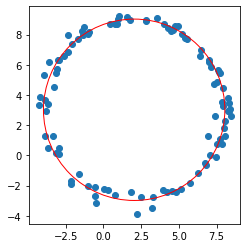

In [14]:
display(fig)